In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AR DATASET/Copy of merged_processed_data.csv')

In [21]:
data.head()

,Unnamed: 0,Unnamed: 0.1,user_id,datetime,x,y,z,label
0,0,4735639,4,2018-12-17 15:00:32.447000+09:00,9.768,-1.110,-0.006,5.0
1,1,5241313,4,2018-12-18 10:52:02.763000+09:00,-1.838,9.117,-0.293,7.0
2,2,5241314,4,2018-12-18 10:52:02.768000+09:00,-1.838,9.117,-0.293,7.0
3,3,5241315,4,2018-12-18 10:52:02.963000+09:00,-1.723,9.117,-0.284,7.0
4,4,5241316,4,2018-12-18 10:52:02.967000+09:00,-1.723,9.117,-0.284,7.0


# New Section

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644170 entries, 0 to 1644169
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0    1644170 non-null  int64  
 1   Unnamed: 0.1  1644170 non-null  int64  
 2   user_id       1644170 non-null  int64  
 3   datetime      1644170 non-null  object 
 4   x             1644170 non-null  float64
 5   y             1644170 non-null  float64
 6   z             1644170 non-null  float64
 7   label         1644170 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 100.4+ MB


In [23]:
data.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
user_id         0
datetime        0
x               0
y               0
z               0
label           0
dtype: int64

**Balancing**

In [24]:
cnt = data['label'].value_counts()
mn = min(cnt);
print(mn)

298


In [25]:
# labels = len(cnt) 
# balanced_data = pd.DataFrame()
# for i in range(1,labels+1):
#   balanced_data = balanced_data.append(data[data['label']==i].head(mn).copy())
# balanced_data.shape

In [26]:
# balanced_data['label'].value_counts()

**Standardization**

In [27]:
X = data[['x','y','z']]
y = data['label']

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data=X, columns=['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,1.511918,-1.191908,-0.602491,5.0
1,-0.435818,1.168532,-0.676280,7.0
2,-0.435818,1.168532,-0.676280,7.0
3,-0.416519,1.168532,-0.673966,7.0
4,-0.416519,1.168532,-0.673966,7.0
...,...,...,...,...
1644165,-0.236614,1.336558,0.385815,12.0
1644166,-0.050332,1.141989,0.580442,12.0
1644167,-0.076009,0.761854,1.042458,12.0
1644168,-1.336013,0.346175,0.787411,12.0


In [29]:
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks//AR DATASET/Copy of processed_07.csv')
test_data

,Unnamed: 0,user_id,datetime,x,y,z,label
0,133161,7,2018-12-02 12:46:41.078000+09:00,3.907,6.359,6.189,4.0
1,133162,7,2018-12-02 12:46:41.282000+09:00,4.022,6.359,6.200,4.0
2,133163,7,2018-12-02 12:46:41.294000+09:00,4.022,6.359,6.200,4.0
3,133164,7,2018-12-02 12:46:41.485000+09:00,4.328,6.397,6.270,4.0
4,133165,7,2018-12-02 12:46:41.489000+09:00,4.328,6.397,6.270,4.0
...,...,...,...,...,...,...,...
184188,14870181,7,2018-12-31 18:46:57.441000+09:00,0.459,9.385,0.344,5.0
184189,14870182,7,2018-12-31 18:46:57.648000+09:00,-0.038,9.270,0.301,5.0
184190,14870183,7,2018-12-31 18:46:57.659000+09:00,-0.038,9.270,0.301,5.0
184191,14870184,7,2018-12-31 18:46:57.840000+09:00,-0.191,9.117,0.327,5.0


In [30]:
EX = test_data[['x','y','z']]
Ey = test_data['label']

In [31]:
scalerE = StandardScaler()
EX = scalerE.fit_transform(EX)

scaled_EX = pd.DataFrame(data=EX, columns=['x', 'y', 'z'])
scaled_EX['label'] = Ey.values

scaled_EX

,x,y,z,label
0,0.817598,-0.240002,1.044411,4.0
1,0.848784,-0.240002,1.047638,4.0
2,0.848784,-0.240002,1.047638,4.0
3,0.931766,-0.228276,1.068175,4.0
4,0.931766,-0.228276,1.068175,4.0
...,...,...,...,...
184188,-0.117446,0.693738,-0.670451,5.0
184189,-0.252225,0.658253,-0.683067,5.0
184190,-0.252225,0.658253,-0.683067,5.0
184191,-0.293716,0.611041,-0.675439,5.0


**Framing**

In [32]:
frame_size = 60
hop_size = 5

In [33]:
def get_frames(df, frame_size, hop_size):
    
    N_FEATURES = 3
    
    frames = []
    labels = []
    
    for i in range(0, len(df)-frame_size, hop_size):
        x = df['x'].values[i: i+frame_size]
        y = df['y'].values[i: i+frame_size]
        z = df['z'].values[i: i+frame_size]
        
        label = stats.mode(df['label'][i: i+frame_size])[0][0]

        frames.append([x, y, z])
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)
    
    return frames, labels

In [34]:
Frame_X, y = get_frames(scaled_X, frame_size, hop_size)
Frame_X.shape, y.shape

((328822, 60, 3), (328822,))

In [35]:
Frame_EX, Ey = get_frames(scaled_EX, frame_size, hop_size)
Frame_EX.shape, Ey.shape

((36827, 60, 3), (36827,))

**Feature Extraction (Mean, Median, Mode, Variance, Standard Deviation, RMS)**

In [36]:
X = []
# Mean_X = []
# Median_X = []
# Mode_X = []
# Var_X = []
# Std_X = []
# RMS_X = []
for i in range(Frame_X.shape[0]):
  mean_X = np.mean(Frame_X[i],axis=0)
  median_X = np.median(Frame_X[i],axis=0)
  mode_X = np.asarray(stats.mode(Frame_X[i])[0][0])
  variance_X = np.var(Frame_X[i],axis=0)
  std_deviation_X = np.std(Frame_X[i],axis=0)
  rms_X = np.sqrt(np.mean(np.square(Frame_X[i]),axis=0))
  max_X = np.max(Frame_X[i],axis=0)
  min_X = np.min(Frame_X[i],axis=0)
  mav_X = np.max(np.absolute(Frame_X[i]),axis=0) #maximum absolute value
  # comb = np.array([mean_X,median_X,mode_X,variance_X,std_deviation_X,rms_X])
  comb = np.array([mean_X,median_X,mode_X,variance_X,std_deviation_X,rms_X,max_X,min_X,mav_X])
  X.append(comb.reshape(-1))
  # Mean_X.append(mean_X)
  # Median_X.append(median_X)
  # Mode_X.append(mode_X)
  # Var_X.append(variance_X)
  # Std_X.append(std_deviation_X)
  # RMS_X.append(rms_X)
X = np.asarray(X)
# Mean_X = np.asarray(Mean_X)
# Median_X = np.asarray(Median_X)
# Mode_X = np.asarray(Mode_X)
# Var_X = np.asarray(Var_X)
# Std_X = np.asarray(Std_X)
# RMS_X = np.asarray(RMS_X)
X.shape

(328822, 27)

In [37]:
EX = []
# Mean_X = []
# Median_X = []
# Mode_X = []
# Var_X = []
# Std_X = []
# RMS_X = []
for i in range(Frame_EX.shape[0]):
  mean_X = np.mean(Frame_EX[i],axis=0)
  median_X = np.median(Frame_EX[i],axis=0)
  mode_X = np.asarray(stats.mode(Frame_EX[i])[0][0])
  variance_X = np.var(Frame_EX[i],axis=0)
  std_deviation_X = np.std(Frame_EX[i],axis=0)
  rms_X = np.sqrt(np.mean(np.square(Frame_EX[i]),axis=0))
  max_X = np.max(Frame_EX[i],axis=0)
  min_X = np.min(Frame_EX[i],axis=0)
  mav_X = np.max(np.absolute(Frame_EX[i]),axis=0) #maximum absolute value
  # comb = np.array([mean_X,median_X,mode_X,variance_X,std_deviation_X,rms_X])
  comb = np.array([mean_X,median_X,mode_X,variance_X,std_deviation_X,rms_X,max_X,min_X,mav_X])
  EX.append(comb.reshape(-1))
  # Mean_X.append(mean_X)
  # Median_X.append(median_X)
  # Mode_X.append(mode_X)
  # Var_X.append(variance_X)
  # Std_X.append(std_deviation_X)
  # RMS_X.append(rms_X)
EX = np.asarray(EX)
# Mean_X = np.asarray(Mean_X)
# Median_X = np.asarray(Median_X)
# Mode_X = np.asarray(Mode_X)
# Var_X = np.asarray(Var_X)
# Std_X = np.asarray(Std_X)
# RMS_X = np.asarray(RMS_X)
EX.shape

(36827, 27)

In [38]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0, stratify = y)
X_train = X
y_train = y
X_test = EX
y_test = Ey
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((328822, 27), (36827, 27), (328822,), (36827,))

# Naive Bayes

In [39]:
# nsamples, nx, ny = X_train.shape
# d2_X_train = X_train.reshape((nsamples, nx*ny))
# nsamples, nx, ny = X_test.shape
# d2_X_test = X_test.reshape((nsamples, nx*ny))

In [40]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.06128655605941293


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(81.24000000000008, 0.5, 'Model Prediction')

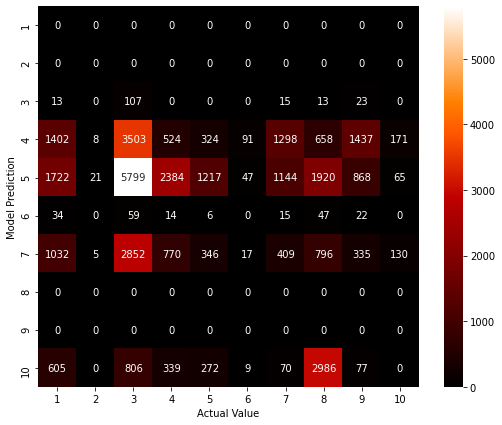

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
from sklearn import metrics
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (9,7))
heat = sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.gist_heat)
class_label = []
for i in range (1,13):
  class_label.append(i)
class_label = np.asarray(class_label) 
heat.set_xticklabels(class_label)
heat.set_yticklabels(class_label)
heat.set_xlabel('Actual Value')
heat.set_ylabel('Model Prediction')